In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np

In [233]:
df = pd.read_csv("data_input.csv")
df

,Unnamed: 0,종목명,stability_1,profitability,decision
0,0,파미셀,-2.450988,6.871194,0
1,1,KTis,47.418488,2.951492,0
2,2,롯데관광개발,-33.779365,-2.553168,0
3,3,부산주공,2.038447,-7.653198,0
4,4,더존비즈온,22.651366,7.018523,0
...,...,...,...,...,...
215,215,STX엔진,-0.803236,-75.621361,1
216,216,대양금속,-11.548827,-17.250448,1
217,217,SG충방,-4.542887,-5.713187,1
218,218,사조대림,3.947057,-0.287269,1


In [240]:
# 피쳐 2개로 의사결정 트리 모델 사용

x = df.iloc[:,2:4]
y = df["decision"]



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)


dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [241]:
dtree.score(X_test,y_test)

0.8636363636363636

In [242]:
from sklearn.metrics import confusion_matrix

y_pred = dtree.predict(X_test)
confusion_matrix(y_test.values, y_pred, labels=[0,1])

array([[34,  3],
       [ 3,  4]], dtype=int64)

In [164]:
# 피쳐 6개로 늘려서 의사결정 트리 모델 사용
# - > 피쳐 2개보다 스코어가 낮게 나옴.

In [243]:
df2 = pd.read_excel("data_input_1.xlsx")
df2

,Unnamed: 0,종목명,stability_1,stability_2,profitability,activity_1,activity_2,growthability,decision
0,0,파미셀,-2.450988,-3.844951,6.871194,0.031037,0.167158,14.568,0
1,1,KTis,47.418488,266.270885,2.951492,0.044119,0.095836,0.044,0
2,2,롯데관광개발,-33.779365,144.174054,-2.553168,-0.028094,-0.059981,16.265,0
3,3,부산주공,2.038447,-40.947988,-7.653198,-0.031648,-0.035424,0.377,0
4,4,더존비즈온,22.651366,92.133610,7.018523,0.091878,0.183502,15.745,0
...,...,...,...,...,...,...,...,...,...
215,215,STX엔진,-0.803236,9.853248,-75.621361,-0.045609,-0.043289,-31.665,1
216,216,대양금속,-11.548827,82.670781,-17.250448,-0.100151,-0.105440,7.644,1
217,217,SG충방,-4.542887,23.564101,-5.713187,-0.034536,-0.096798,26.411,1
218,218,사조대림,3.947057,57.018286,-0.287269,0.023456,0.038784,8.473,1


In [256]:

x2 = df2.iloc[:,2:8]
y2 = df2["decision"]



X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=121)


dtree = DecisionTreeClassifier()
dtree.fit(X2_train,y2_train)

dtree.score(X2_test,y2_test)

0.8181818181818182

In [257]:
y_pred = dtree.predict(X2_test)
confusion_matrix(y2_test.values, y_pred, labels=[0,1])

array([[33,  4],
       [ 4,  3]], dtype=int64)

In [258]:
# 의사결정 트리 모델의 최적 파라미터 찾기

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3,4], 'splitter' : ['best','random'] }

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=4, refit=True)

grid_dtree.fit(X2_train, y2_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score','split3_test_score']].sort_values("mean_test_score",ascending=False)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score
0,"{'max_depth': 1, 'min_samples_split': 2, 'spli...",0.914773,1,0.954545,0.886364,0.909091,0.909091
2,"{'max_depth': 1, 'min_samples_split': 3, 'spli...",0.914773,1,0.954545,0.886364,0.909091,0.909091
4,"{'max_depth': 1, 'min_samples_split': 4, 'spli...",0.914773,1,0.954545,0.886364,0.909091,0.909091
12,"{'max_depth': 3, 'min_samples_split': 2, 'spli...",0.909091,4,0.931818,0.840909,0.931818,0.931818
14,"{'max_depth': 3, 'min_samples_split': 3, 'spli...",0.909091,4,0.931818,0.840909,0.931818,0.931818
16,"{'max_depth': 3, 'min_samples_split': 4, 'spli...",0.903409,6,0.931818,0.840909,0.909091,0.931818
6,"{'max_depth': 2, 'min_samples_split': 2, 'spli...",0.892045,7,0.886364,0.840909,0.909091,0.931818
8,"{'max_depth': 2, 'min_samples_split': 3, 'spli...",0.892045,7,0.886364,0.840909,0.909091,0.931818
10,"{'max_depth': 2, 'min_samples_split': 4, 'spli...",0.892045,7,0.886364,0.840909,0.909091,0.931818
13,"{'max_depth': 3, 'min_samples_split': 2, 'spli...",0.892045,7,0.886364,0.840909,0.909091,0.931818


In [259]:
grid_dtree.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'}

In [294]:
# 최적 파라미터  설정해보기

from sklearn.metrics import accuracy_score

best = grid_dtree.best_estimator_

pred = best.predict(X2_test)
print('정확도:{:.4f}'.format(accuracy_score(y2_test, pred)))

정확도:0.9318


In [295]:
# 최적 파라미터 적용 후 컨퓨전매트릭스

confusion_matrix(y2_test.values, pred, labels=[0,1])

array([[36,  1],
       [ 2,  5]], dtype=int64)

In [318]:
# 피쳐 6개로 랜덤포레스트 모델 적용

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

rf.score(X2_test,y2_test)

0.9318181818181818

In [319]:
y_rf_pred = rf.predict(X2_test)
confusion_matrix(y2_test.values, y_rf_pred, labels=[0,1])

array([[36,  1],
       [ 2,  5]], dtype=int64)

In [320]:
# 랜덤포레스트 피쳐 중요도 확인

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.357507)
2. feature 3 (0.151880)
3. feature 4 (0.134130)
4. feature 0 (0.125180)
5. feature 5 (0.120796)
6. feature 1 (0.110508)


In [351]:


from sklearn.model_selection import cross_val_score

random_forest_scores = cross_val_score(rf, x2, y2, cv=10)
decision_tree_scores = cross_val_score(best, x2, y2, cv=10)

random_forest_scores


array([0.95454545, 0.86363636, 0.90909091, 0.95454545, 0.86363636,
       0.86363636, 0.90909091, 0.95454545, 1.        , 0.86363636])

In [352]:
decision_tree_scores

array([1.        , 0.86363636, 0.95454545, 0.95454545, 0.86363636,
       0.86363636, 0.90909091, 1.        , 1.        , 0.86363636])

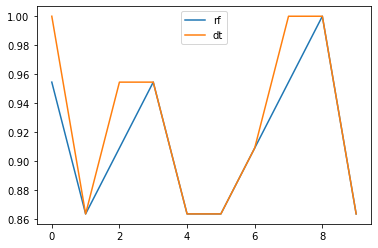

In [353]:
import matplotlib.pyplot as plt

plt.plot(range(10),random_forest_scores,range(10),decision_tree_scores)
plt.legend(['rf','dt'])
plt.show()

In [8]:
import pickle

#저장
with open("tree.model", "wb") as f :
    pickle.dump(dtree, f)

In [9]:
with open("tree.model", "rb") as f:
    tree_from_file = pickle.load(f)
    
tree_from_file

DecisionTreeClassifier()